# Glass

In [23]:
import numpy as np
from sklearn import decomposition
import matplotlib.pyplot as plt
from urllib import request

url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/glass.csv"
f = request.urlopen(url)
dataset = np.loadtxt(f, dtype=float, delimiter=',', skiprows=1) 
n, feat = dataset.shape
dataset

array([[ 1.52101, 13.64   ,  4.49   , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  0.     ,  0.     ,  1.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  1.64   ,  0.     ,  7.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  1.57   ,  0.     ,  7.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  1.67   ,  0.     ,  7.     ]])

In [24]:
TARGET_COLUMNS = ["Type"]
X = dataset[:,:feat-1]
y = dataset[:,feat-1].copy()

In [25]:
X0 = X - X.mean()

In [26]:
ECM = np.zeros(shape=(feat-1))
energia = np.zeros(shape=(feat-1))

for i in range(1, feat):
  pca = decomposition.PCA(n_components=i)
  pca.fit(X0)
  U = pca.transform(X0) 
  Xh = pca.inverse_transform(U)
  ECM[i-1] = np.sum((X0-Xh)**2)/n
  energia[i-1] = np.sum(pca.explained_variance_ratio_)

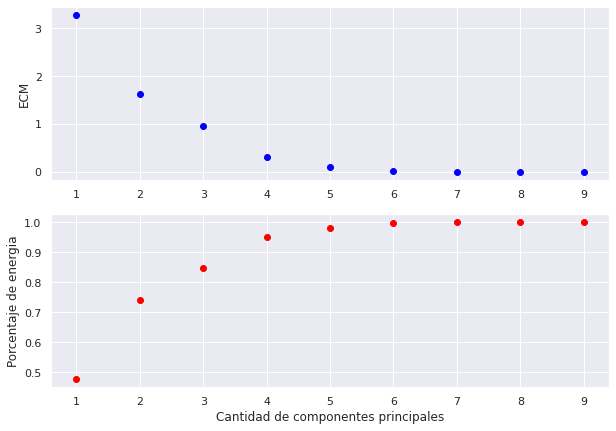

In [27]:
fig, axs = plt.subplots(2, figsize=(10, 7))

for i in range(0, feat-1):
  axs[0].plot(i+1, ECM[i], 'o', color="blue")
  axs[1].plot(i+1, energia[i], 'o', color="red")


axs[0].set(ylabel="ECM" )
axs[1].set(ylabel="Porcentaje de energia" )
plt.xlabel("Cantidad de componentes principales")
plt.show()

In [28]:
pca = decomposition.PCA(n_components=1)
pca.fit(X0)
U = pca.transform(X0) 
Xh = pca.inverse_transform(U)

ave = pca.components_
ava = pca.explained_variance_
print('Autovector:', ave) 
print('Autovalor:', ava) 
print('Porcentaje de energia:',pca.explained_variance_ratio_) 

Autovector: [[ 0.00092813  0.01722483 -0.72353491  0.04633522 -0.00769381 -0.07840429
   0.6797168   0.07635801  0.0009057 ]]
Autovalor: [3.00200916]
Porcentaje de energia: [0.47620525]


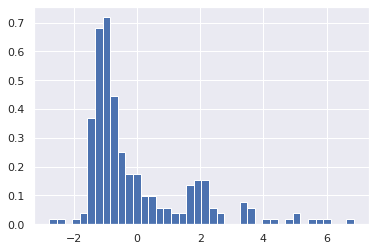

In [29]:
from scipy import stats as st


plt.hist(U, bins=40, density=True)
plt.show()

In [30]:
mu = U.mean()
sigma = np.sqrt(np.sum((U-U.mean())**2/(n-1)))

Propongo que:

\begin{equation}
  U \sim \mathcal{N}(\mu, \sigma)
\end{equation}

Luego:
\begin{equation}
  X \sim \mathcal{U}(0,1)
\end{equation}

\begin{equation}
  P(X\le{x}) = P(U\le{u})
\end{equation}

\begin{equation}
  F_X(x) = F_U(u)
\end{equation}

\begin{equation}
  x = \phi(u)
\end{equation}

\begin{equation}
  u = \phi(x)^{-1}
\end{equation}


In [31]:
alpha_sim = (np.random.randn(5) + mu) * sigma

alpha_sim = np.reshape(alpha_sim, (1,5,1))
pca.inverse_transform(alpha_sim) + X.mean()

array([[[1.51713861e+00, 1.33850825e+01, 3.64090753e+00, 1.38366024e+00,
         7.26611043e+01, 6.00691550e-01, 8.05850696e+00, 7.41160370e-02,
         5.58121898e-02],
        [1.51771082e+00, 1.33957020e+01, 3.19483486e+00, 1.41222676e+00,
         7.26563610e+01, 5.52353856e-01, 8.47756496e+00, 1.21192165e-01,
         5.63705677e-02],
        [1.51795200e+00, 1.34001779e+01, 3.00682180e+00, 1.42426713e+00,
         7.26543617e+01, 5.31980230e-01, 8.65419173e+00, 1.41034060e-01,
         5.66059158e-02],
        [1.51917983e+00, 1.34229648e+01, 2.04965097e+00, 1.48556441e+00,
         7.26441835e+01, 4.28258498e-01, 9.55339518e+00, 2.42048757e-01,
         5.78040682e-02],
        [1.51991766e+00, 1.34366580e+01, 1.47446171e+00, 1.52239957e+00,
         7.26380671e+01, 3.65929365e-01, 1.00937503e+01, 3.02751161e-01,
         5.85240696e-02]]])

# Prostata

In [32]:
import numpy as np
from sklearn import decomposition
import matplotlib.pyplot as plt
from urllib import request

prostata_data = np.genfromtxt(request.urlopen("https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/prostata_data.csv"), delimiter=',', skip_header=True)
prostata_label = np.genfromtxt(request.urlopen("https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/prostata_label.csv"), delimiter=',', skip_header=True, dtype="str")

In [33]:
prostata_data = prostata_data[:,1:-1]
prostata_label = prostata_label[:,1]
dataset = np.c_[prostata_data, prostata_label]
dataset = dataset[dataset[:,-1] != '']
dataset

array([['182.88666186557907', '0.0', '120.05514344779301', ...,
        '78.37018497556028', '1194.6142797413468', 'healthy'],
       ['169.43159030962224', '4.546040591889395', '298.45756678247994',
        ..., '108.7634073540107', '926.9470629677108', 'healthy'],
       ['33.12437860839822', '1717.1493536474945', '171.34008138556848',
        ..., '27.398994070467992', '510.64609776288006', 'cancer'],
       ...,
       ['113.63945879890655', '1.4285461257602596', '89.56082978818914',
        ..., '111.93171044261584', '447.58706049886086', 'benign'],
       ['100.94499664510126', '213.6023595973982', '533.7078535932463',
        ..., '157.6249104461427', '630.2223691989038', 'benign'],
       ['17.15438852402047', '20.59355440565786', '167.40034087942942',
        ..., '56.84535066851054', '137.33733651318974', 'cancer']],
      dtype='<U32')

In [34]:
valores_unicos = np.unique(dataset[:,-1], return_inverse=True)
dataset[:,-1] = valores_unicos[1]
categorias = valores_unicos[0]

In [35]:
x_train = dataset[:,:-2]
x_train = x_train.astype(float)
y_train = dataset[:,-1]
y_train = y_train.astype(int)
x_train.shape

(390, 760)

In [36]:
n, feat = x_train.shape
X0 = (x_train - x_train.mean())/x_train.std()

In [37]:
from tqdm import tqdm
step = 10
limit = min(n, feat) // step

ECM = np.zeros(shape=(limit))
energia = np.zeros(shape=(limit))


for i in tqdm(range(0, limit)):
  pca = decomposition.PCA(n_components=i*step)
  pca.fit(X0)
  U = pca.transform(X0) 
  Xh = pca.inverse_transform(U)
  ECM[i] = np.sum((X0-Xh)**2)/n
  energia[i] = np.sum(pca.explained_variance_ratio_)

100%|██████████| 39/39 [00:03<00:00, 11.78it/s]


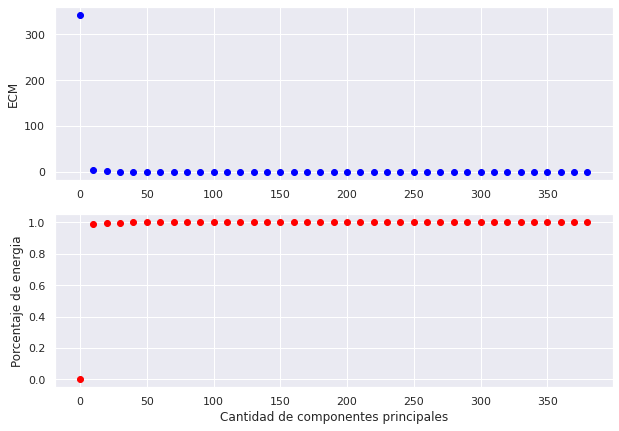

In [38]:
fig, axs = plt.subplots(2, figsize=(10, 7))

for i in range(0, limit):
  axs[0].plot(i*step, ECM[i], 'o', color="blue")
  axs[1].plot(i*step, energia[i], 'o', color="red")


axs[0].set(ylabel="ECM" )
axs[1].set(ylabel="Porcentaje de energia" )
plt.xlabel("Cantidad de componentes principales")
plt.show()

In [39]:
pca = decomposition.PCA(n_components=2)
pca.fit(X0)
U = pca.transform(X0) 
Xh = pca.inverse_transform(U)

ave = pca.components_
ava = pca.explained_variance_

In [40]:
colores = np.array(['red', 'blue', 'green', 'yellow'])

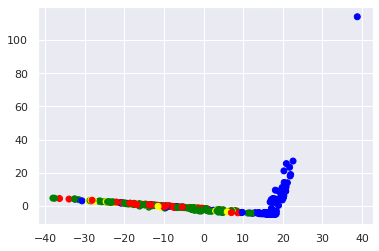

In [41]:
plt.scatter(x=U[:,0], y=U[:,1], color=colores[y_train])
plt.show()

# MNIST

In [42]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import decomposition
import seaborn as sns

sns.set()

mnist = tf.keras.datasets.mnist
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
(anomaly_train_images, anomaly_train_labels), (anomaly_test_images, anomaly_test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [43]:
def show_images(images, labels=None, image_count=25, random=True):
  plt.figure(figsize=(10,10))
  cant_subplot = np.sqrt(image_count)
  cant_subplot_int = int(cant_subplot)

  if(cant_subplot_int != cant_subplot):
    print("image_count no es un numero con raiz entera, se va a recortar el numero de imagenes") 

  for i in range(image_count):
    plt.subplot(cant_subplot,cant_subplot,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img_index = i
    if random:
      img_index = np.random.randint(0, images.shape[0])
    plt.imshow(images[img_index], cmap="gray_r")
    if labels is not None:
      plt.xlabel(labels[img_index])

In [44]:
X0 = (train_images - train_images.mean())
X0= np.reshape(X0, (X0.shape[0], X0.shape[1]*X0.shape[2]))
n, feat = X0.shape

### 1.

In [45]:
from tqdm import tqdm
step = 10
limit = min(n, feat)
ECM = np.zeros(shape=(limit // step))
energia = np.zeros(shape=(limit // step))

In [46]:
pca = decomposition.PCA(n_components=limit)
pca.fit(X0)
U = pca.transform(X0) 
Xh = pca.inverse_transform(U)
ave = pca.components_
ava_normalizado = pca.explained_variance_ratio_

In [47]:
for i in tqdm(range(0, limit // step)):
  Xhi = U[:,:i*step]@ave[:i*step] + pca.mean_
  ECM[i] = np.sum((X0-Xhi)**2)/n
  energia[i] = np.sum(ava_normalizado[:i*step])

100%|██████████| 78/78 [01:22<00:00,  1.05s/it]


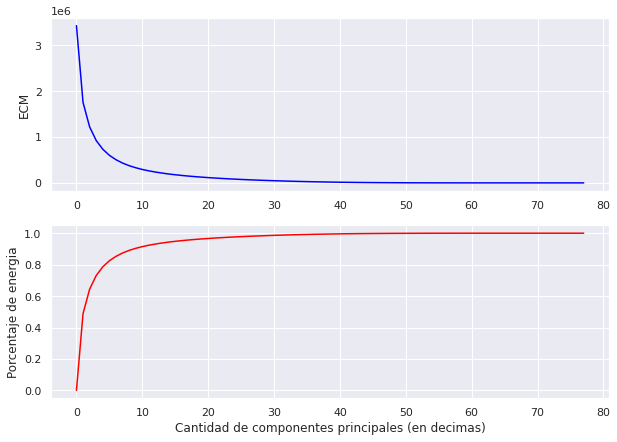

In [48]:
fig, axs = plt.subplots(2, figsize=(10, 7))

axs[0].plot(ECM, color="blue", )
axs[1].plot(energia, color="red")

axs[0].set(ylabel="ECM" )
axs[1].set(ylabel="Porcentaje de energia" )
plt.xlabel("Cantidad de componentes principales (en decimas)")
plt.show()

In [49]:
ECM[30], energia[30]

(47213.987355269535, 0.9862287476125926)

### 2. Podemos ver que con 300 componentes principales, tenemos una energia muy cerca de 98.6% y cerca de 7.65 ECM

In [50]:
test_images_normalizadas = test_images - train_images.mean()
shape_original = test_images_normalizadas.shape
test_images_normalizadas = np.reshape(test_images_normalizadas, (shape_original[0], shape_original[1]*shape_original[2]))

In [51]:
componentes_principales = 300
U_testeo = pca.transform(test_images_normalizadas)
Xh_testeo = U_testeo[:,:componentes_principales]@ave[:componentes_principales] + pca.mean_
Xh_testeo = np.reshape(Xh_testeo, (shape_original[0], shape_original[1], shape_original[2]))

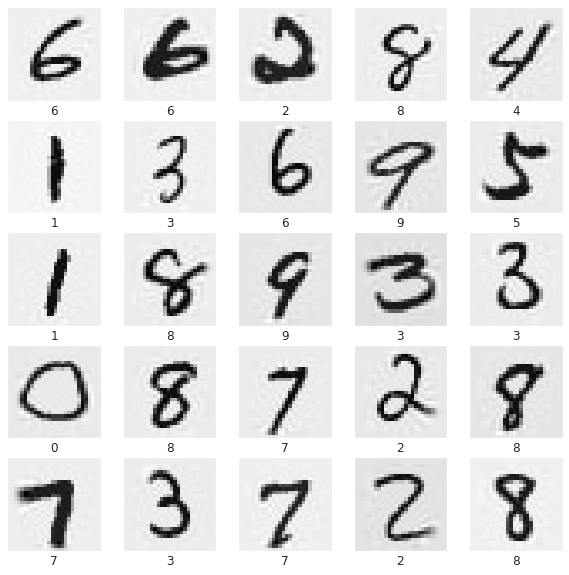

In [52]:
show_images(Xh_testeo, test_labels)

### 3. Manifold

In [53]:
pca = decomposition.PCA(n_components=2)
pca.fit(X0)
U = pca.transform(X0) 

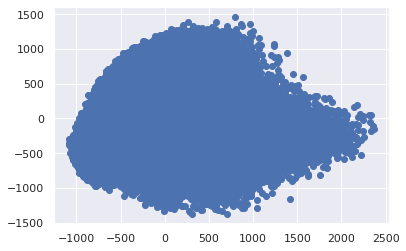

In [54]:
plt.scatter(x=U[:,0], y=U[:,1])
plt.show()

In [55]:
minimos = U.min(axis=0)
maximos = U.max(axis=0)

print(f"Limites en eje x: ({minimos[0]}; {maximos[0]})")
print(f"Limites en eje y: ({minimos[1]}; {maximos[1]})")

Limites en eje x: (-1081.6596078237617; 2363.3241008257783)
Limites en eje y: (-1382.3362658578144; 1465.942708868238)


In [56]:
grilla_eje_x = np.linspace(start=minimos[0], stop=maximos[0], num=10)
grilla_eje_y = np.linspace(start=minimos[1], stop=maximos[1], num=10)

X,Y = np.meshgrid(grilla_eje_x, grilla_eje_y)

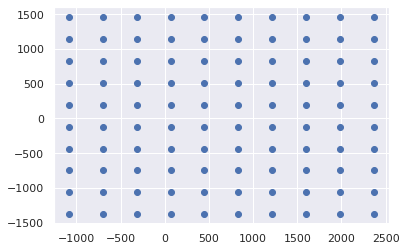

In [57]:
plt.scatter(x=X, y=Y)
plt.show()

In [58]:
reconstruccion = [pca.inverse_transform(np.array([x,y])) for y in grilla_eje_y for x in grilla_eje_x]
reconstruccion = np.array(reconstruccion)

In [59]:
reconstruccion = reconstruccion.reshape(100, 28, 28)

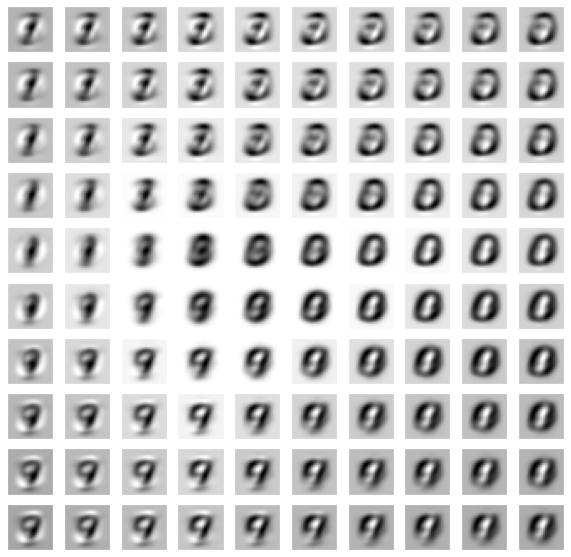

In [60]:
show_images(reconstruccion, image_count=100, random=False)

### 4. Anomalias

In [61]:
pca = decomposition.PCA(n_components=300)
pca.fit(X0)

PCA(n_components=300)

In [62]:
dataset_mezclado = np.concatenate([test_images, anomaly_test_images])
dataset_mezclado_normalizado = dataset_mezclado - dataset_mezclado.mean()
shape_original = dataset_mezclado_normalizado.shape

dataset_mezclado_reshape = np.reshape(dataset_mezclado_normalizado, (shape_original[0], shape_original[1]*shape_original[2]))

shape_original, dataset_mezclado_reshape.shape

((20000, 28, 28), (20000, 784))

In [63]:
U = pca.transform(dataset_mezclado_reshape)
Xh = pca.inverse_transform(U)
EC = np.sum(dataset_mezclado_reshape-Xh, axis=1)**2

In [64]:
umbral = 2*EC.mean()

dataset_filtrado = dataset_mezclado_reshape[EC < umbral]

In [65]:
dataset_filtrado_reshape = dataset_filtrado.reshape(dataset_filtrado.shape[0], shape_original[1], shape_original[2])
dataset_filtrado_reshape.shape

(19569, 28, 28)

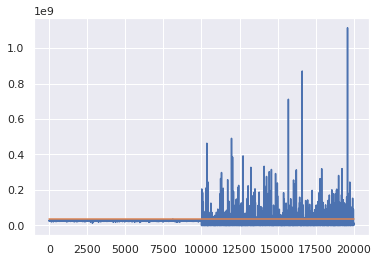

In [66]:
plt.plot(EC)
plt.plot([0,19999], [umbral, umbral])
plt.show()

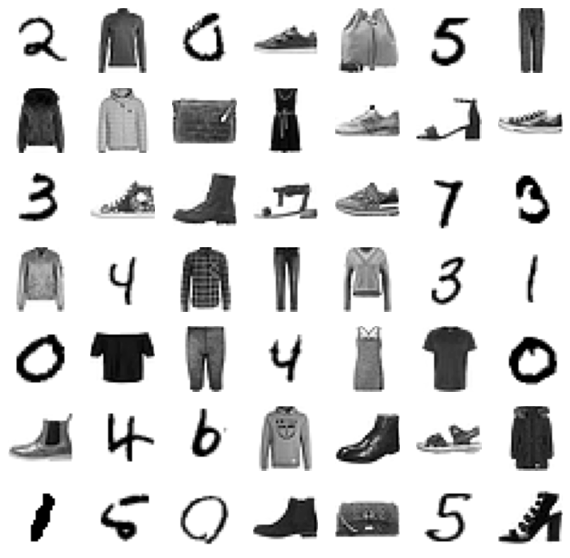

In [67]:
show_images(dataset_filtrado_reshape, image_count=49)

In [68]:
def positive_rates(EC, step = 5000000, umbral_start=None, umbral_stop=None):
  if umbral_start is None:
    umbral_start = int(np.floor(EC.min()))

  if umbral_start is None:
    umbral_stop = int(np.ceil(EC.max()))

  mask = np.full((20000), False)
  mask[:10000] = True

  size = int(np.ceil((umbral_stop-umbral_start) // step))
  TP = np.zeros((size))
  FP = np.zeros((size))

  for i in range(0, size):
    umbral = i*step + umbral_start
    TP[i] = dataset_mezclado_reshape[(EC <= umbral) & mask].shape[0]
    FP[i] = dataset_mezclado_reshape[(EC <= umbral) & (np.logical_not(mask))].shape[0]

  TPR = TP / 10000
  FPR = FP / 10000
  TNR = 1 - FPR
  FNR = 1 - TPR

  return TPR, FPR, TNR, FNR

TPR, FPR, TNR, FNR = positive_rates(EC, step=1000000, umbral_start=0, umbral_stop=10*EC.mean())


EER: 0.2806


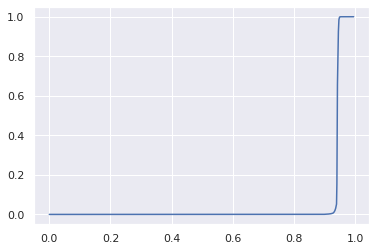

In [69]:
plt.plot(FPR, TPR)

EER = (FPR[FNR != 0]/FNR[FNR != 0])
EER = EER[EER != 0]

print("EER:", EER.min())

plt.show()

### 5.

In [70]:
pca = decomposition.PCA(n_components=300)
pca.fit(X0)
U = pca.transform(X0)

In [71]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(np.unique(train_labels).size,  input_dim=U.shape[1], activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                3010      
                                                                 
Total params: 3,010
Trainable params: 3,010
Non-trainable params: 0
_________________________________________________________________


In [72]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
hist = model.fit(x=U, y=train_labels, batch_size = U.shape[0], epochs=2000, callbacks=[es])

Epoch 1/2000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1/1 [==============================] - 1s 617ms/step - loss: 215.7013 - accuracy: 0.1288
Epoch 2/2000
1/1 [==============================] - 0s 78ms/step - loss: 124.6632 - accuracy: 0.2729
Epoch 3/2000
1/1 [==============================] - 0s 74ms/step - loss: 86.5697 - accuracy: 0.4066
Epoch 4/2000
1/1 [==============================] - 0s 71ms/step - loss: 68.0448 - accuracy: 0.4791
Epoch 5/2000
1/1 [==============================] - 0s 66ms/step - loss: 56.9841 - accuracy: 0.5322
Epoch 6/2000
1/1 [==============================] - 0s 68ms/step - loss: 49.6915 - accuracy: 0.5705
Epoch 7/2000
1/1 [==============================] - 0s 65ms/step - loss: 44.4871 - accuracy: 0.6007
Epoch 8/2000
1/1 [==============================] - 0s 74ms/step - loss: 40.5710 - accuracy: 0.6253
Epoch 9/2000
1/1 [==============================] - 0s 67ms/step - loss: 37.4925 - accuracy: 0.6442
Epoch 10/2000
1/1 [==============================] - 0s 73ms/step - loss: 34.9953 - accuracy: 0.6618
Epoch 11/

In [73]:
losses = hist.history["loss"]
accuracies = hist.history["accuracy"]

print(f"El riesgo empirico final fue {losses[-1]}")
print(f"La accuracy final fue {accuracies[-1]}")

El riesgo empirico final fue 1.5832059383392334
La accuracy final fue 0.8916666507720947


In [74]:
X_test = (test_images - train_images.mean())
X_test= np.reshape(X_test, (X_test.shape[0], X_test.shape[1]*X_test.shape[2]))

x_test_transformado = pca.transform(X_test)
x_test_transformado

array([[-332.27116927,  747.7987162 ,  -42.84481899, ...,   -6.51206774,
          12.54057191,   26.20369221],
       [  20.69696209, -955.58458273, -152.71551708, ...,  -18.58060388,
           5.64191016,  -16.63244834],
       [-946.02686793, -430.84318261,   66.17633643, ...,   15.28732284,
           3.32057632,    6.39073231],
       ...,
       [-270.18775455,  596.87008733,  355.11067576, ...,   -2.87666991,
           6.15426663,  -46.6888302 ],
       [-314.0271918 , -108.60355644,  642.83980125, ...,   -4.67409663,
          -6.00290661,  -39.17547478],
       [1042.38930719,  -90.5147068 ,  706.11902876, ...,  -12.80602796,
          -5.6221174 ,    4.02263982]])

In [75]:
y_pred = model.predict(x_test_transformado).argmax(axis=1)
y_pred

313/313 [==============================] - 0s 829us/step


array([7, 2, 1, ..., 4, 5, 6])

Baseline model:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       980
           1       0.93      0.96      0.94      1135
           2       0.90      0.86      0.88      1032
           3       0.87      0.88      0.88      1010
           4       0.91      0.87      0.89       982
           5       0.85      0.83      0.84       892
           6       0.89      0.92      0.91       958
           7       0.90      0.84      0.87      1028
           8       0.86      0.81      0.83       974
           9       0.81      0.90      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



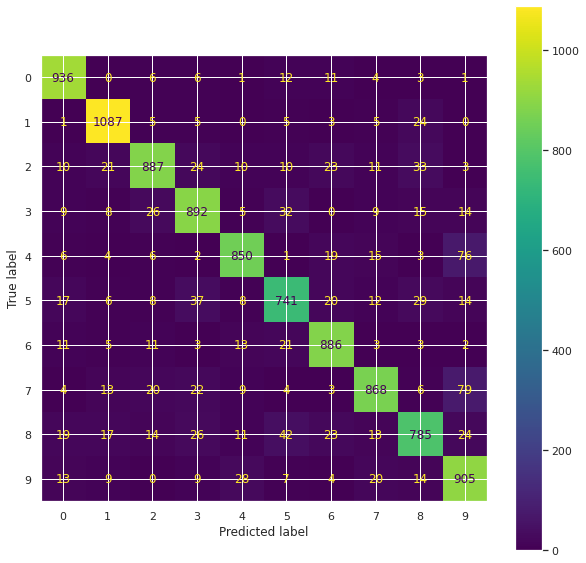

In [76]:
# from matplotlib import axis
from sklearn.metrics import ConfusionMatrixDisplay, classification_report


def show_results(y_true,y_pred):

  # Plot confusion matrix
  fig, ax = plt.subplots(1,1,figsize=(10,10))
  dsp = ConfusionMatrixDisplay.from_predictions(y_true,y_pred,ax=ax)

  # Show Classification report
  print(classification_report(y_true,y_pred))


print("Baseline model:")
show_results(test_labels,y_pred)

In [77]:
Xh = pca.inverse_transform(U)
Xh.shape

(60000, 784)

In [78]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(np.unique(train_labels).size,  input_dim=Xh.shape[1], activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [79]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0005), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
hist = model.fit(x=Xh, y=train_labels, batch_size = Xh.shape[0], epochs=2000, callbacks=[es])

Epoch 1/2000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1/1 [==============================] - 1s 520ms/step - loss: 162.5780 - accuracy: 0.1377
Epoch 2/2000
1/1 [==============================] - 0s 135ms/step - loss: 101.7461 - accuracy: 0.2173
Epoch 3/2000
1/1 [==============================] - 0s 129ms/step - loss: 62.6976 - accuracy: 0.3175
Epoch 4/2000
1/1 [==============================] - 0s 138ms/step - loss: 47.2847 - accuracy: 0.4318
Epoch 5/2000
1/1 [==============================] - 0s 151ms/step - loss: 38.9766 - accuracy: 0.4907
Epoch 6/2000
1/1 [==============================] - 0s 136ms/step - loss: 33.5482 - accuracy: 0.5381
Epoch 7/2000
1/1 [==============================] - 0s 145ms/step - loss: 29.8700 - accuracy: 0.5750
Epoch 8/2000
1/1 [==============================] - 0s 137ms/step - loss: 27.0002 - accuracy: 0.6024
Epoch 9/2000
1/1 [==============================] - 0s 143ms/step - loss: 24.8515 - accuracy: 0.6288
Epoch 10/2000
1/1 [==============================] - 0s 135ms/step - loss: 23.1158 - accuracy: 0.6460


In [80]:
y_pred = model.predict(X_test).argmax(axis=1)
y_pred

313/313 [==============================] - 0s 903us/step


array([7, 2, 1, ..., 4, 5, 6])

Baseline model:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       980
           1       0.95      0.96      0.95      1135
           2       0.85      0.85      0.85      1032
           3       0.81      0.83      0.82      1010
           4       0.88      0.85      0.87       982
           5       0.77      0.87      0.81       892
           6       0.91      0.90      0.91       958
           7       0.92      0.83      0.87      1028
           8       0.88      0.70      0.78       974
           9       0.76      0.89      0.82      1009

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



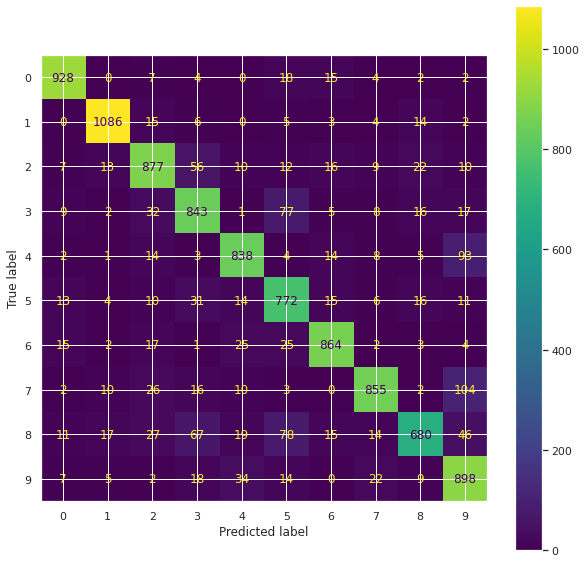

In [81]:
print("Baseline model:")
show_results(test_labels,y_pred)

Los resultados son todos muy similares, excepto por la reconstruccion que pareceria haber dado resultados levemente peores.

# BuzzFeed

In [82]:
import os
!pip install fasttext
import fasttext
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from IPython.display import clear_output
import xml.etree.ElementTree as ET
from sklearn import decomposition



if not os.path.exists("cc.en.300.bin"):
  # Más vectores de palabras en https://github.com/dccuchile/spanish-word-embeddings
  !wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
  !gzip -d cc.en.300.bin.gz
  


if not os.path.exists("articles/"):
  !wget https://zenodo.org/record/1239675/files/articles.zip?download=1 -O articles.zip
  !unzip articles.zip
  !rm articles.zip

clear_output()
print("Data successfully downloaded")

sns.set()
random_seed = 20

Data successfully downloaded


In [83]:
model = fasttext.load_model('cc.en.300.bin')

In [84]:
def read_data(test_size=0.2,random_state=0):
  data = {
      # "author": [],
      # "title": [],
      "mainText": [],
      "orientation": [],
      # "veracity": []
  }
  index = []
  for filename in os.listdir("articles/"):
    root = ET.parse(f"articles/{filename}").getroot()
    index.append(int(filename.split(".")[0]))
    for elem in root:
      if elem.tag in data.keys():
        data[elem.tag].append(elem.text)
  data = pd.DataFrame(data,index=index)
  data = data[data.notna().all(axis="columns")]
  data = data.sample(frac=1,random_state=random_state)
  N = len(data)
  train_split, test_split = data.iloc[int(N*test_size):,:], data.iloc[:int(N*test_size),:]
  train_split = train_split.reset_index(drop=True)
  test_split = test_split.reset_index(drop=True)
  return train_split, test_split
  
train_split, test_split = read_data(test_size=0.2,random_state=random_seed)
train_split

,mainText,orientation
0,Top Hillary Clinton aide Cheryl Mills received...,mainstream
1,Party People is a new podcast from CNN where a...,mainstream
2,A Chat With The Devil The share of the small b...,right
3,(CNN)US forces will be ready within weeks to h...,mainstream
4,"With seven weeks until Election Day, Hillary C...",mainstream
...,...,...
1279,"As if this week was not tragic enough, we get ...",right
1280,"Its prospects are far from clear, but talk abo...",mainstream
1281,"The city of Flint, Michigan is suffering throu...",left
1282,"Donald Trump feels like a man half his age, an...",mainstream


In [85]:
def normalize_text(corpus, stop_words = None):
  corpus_lower = corpus.str.lower()

  normalized_corpus = corpus_lower.str.replace(r"[^\w\d\s]+","",regex=True)
  
  if stop_words is not None:
    normalized_corpus = normalized_corpus.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

  normalized_corpus = normalized_corpus.str.replace(r"\s+"," ",regex=True)

  return normalized_corpus

train_data, test_data = read_data(test_size=0.2,random_state=random_seed)
train_data["mainText"] = normalize_text(train_data["mainText"],stop_words=None)
train_data

,mainText,orientation
0,top hillary clinton aide cheryl mills received...,mainstream
1,party people is a new podcast from cnn where a...,mainstream
2,a chat with the devil the share of the small b...,right
3,cnnus forces will be ready within weeks to hel...,mainstream
4,with seven weeks until election day hillary cl...,mainstream
...,...,...
1279,as if this week was not tragic enough we get h...,right
1280,its prospects are far from clear but talk abou...,mainstream
1281,the city of flint michigan is suffering throug...,left
1282,donald trump feels like a man half his age and...,mainstream


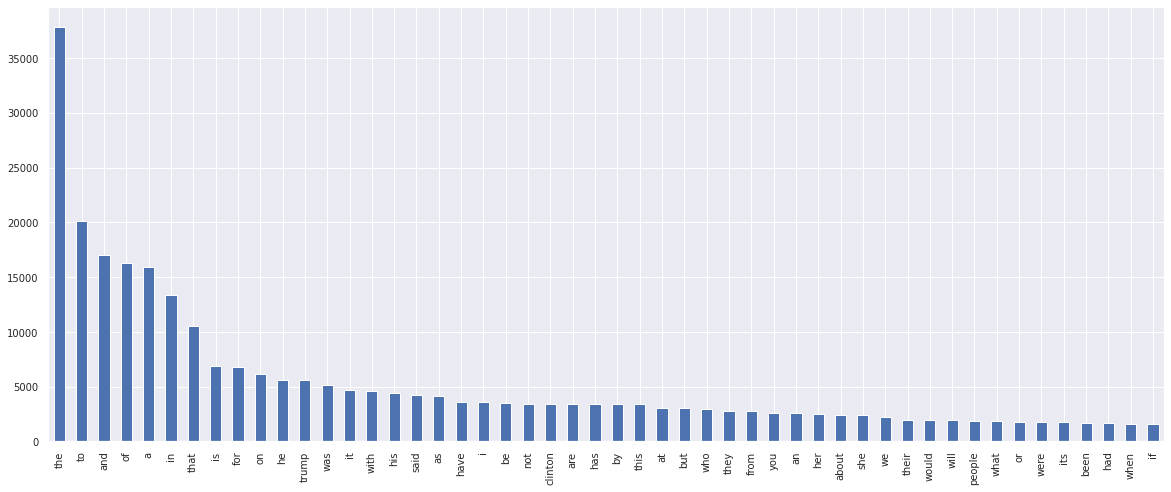

In [86]:
from collections import defaultdict

def create_vocabulary(corpus, max_tokens=40000, min_freq=1):
  vocab = defaultdict(lambda: 0)
  for content in corpus:
    # print(content)
    for word in content.split():
      vocab[word] += 1

  valid_tokens = sorted([token for token in vocab.keys() if vocab[token] >= min_freq], key=vocab.get,reverse=True)[:max_tokens]
  return pd.Series(vocab,index=valid_tokens)

vocab = create_vocabulary(train_data["mainText"])
fig, ax = plt.subplots(1,1,figsize=(20,8))
vocab[:50].plot(kind="bar",ax=ax,fontsize=10)
ax.grid(True)

In [87]:
from nltk import word_tokenize
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_eng = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [88]:
train_data, test_data = read_data(test_size=0.2,random_state=random_seed)
train_data["mainText"] = normalize_text(train_data["mainText"],stop_words=stopwords_eng)
train_data

,mainText,orientation
0,top hillary clinton aide cheryl mills received...,mainstream
1,party people new podcast cnn pair conservative...,mainstream
2,chat devil share small business market dwindli...,right
3,cnnus forces ready within weeks help iraqi for...,mainstream
4,seven weeks election day hillary clinton allie...,mainstream
...,...,...
1279,week tragic enough get hit news seems every me...,right
1280,prospects far clear talk impeachment gov chris...,mainstream
1281,city flint michigan suffering horrible manmade...,left
1282,donald trump feels like man half age hillary c...,mainstream


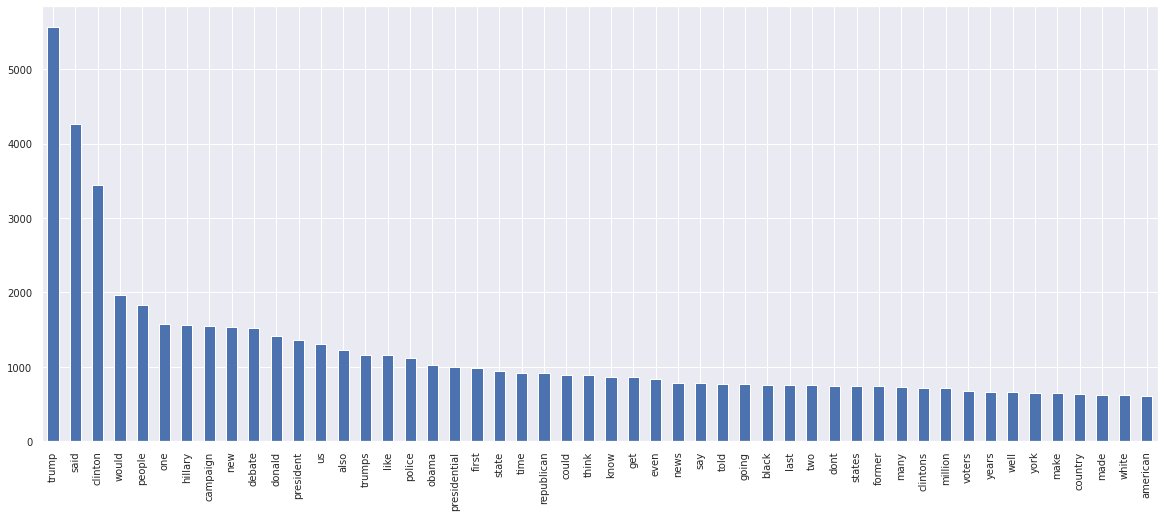

In [89]:
vocab = create_vocabulary(train_data["mainText"])
fig, ax = plt.subplots(1,1,figsize=(20,8))
vocab[:50].plot(kind="bar",ax=ax,fontsize=10)
ax.grid(True)

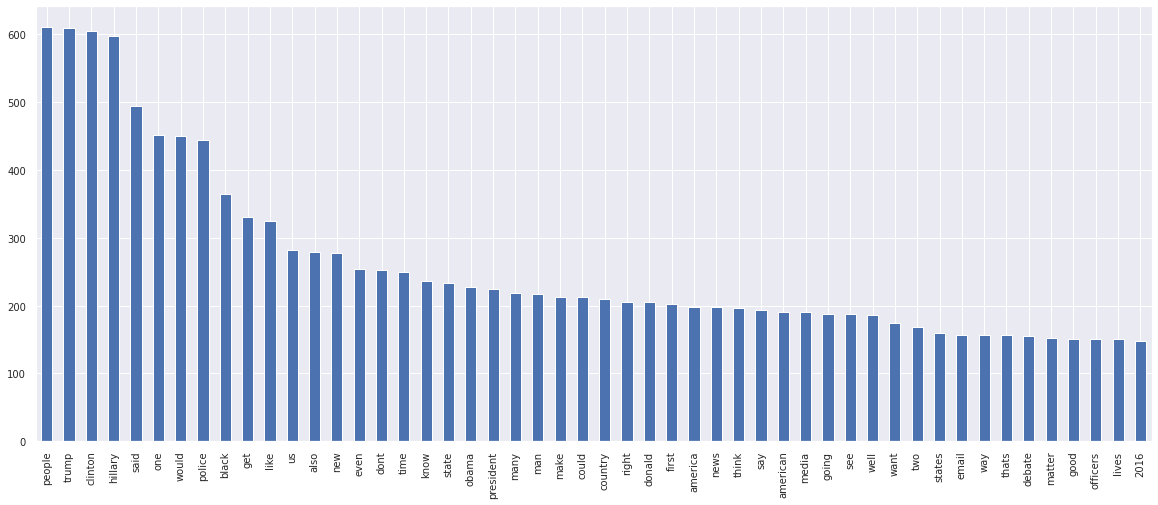

In [90]:
data_der = train_data[train_data['orientation'] == 'right']
vocab_der = create_vocabulary(data_der["mainText"])
fig, ax = plt.subplots(1,1,figsize=(20,8))
vocab_der[:50].plot(kind="bar",ax=ax,fontsize=10)
ax.grid(True)

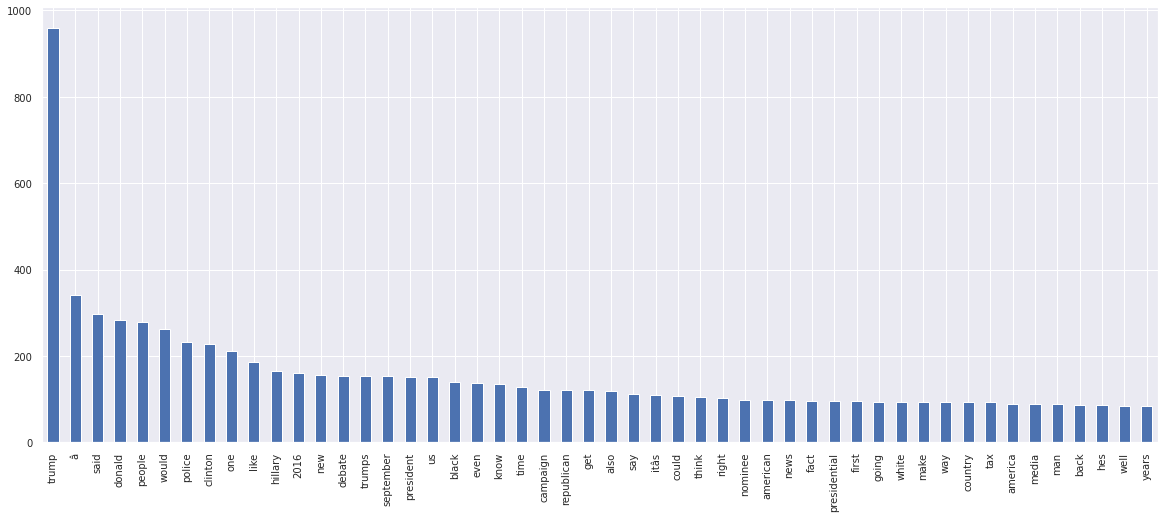

In [91]:
data_izq = train_data[train_data['orientation'] == 'left']
vocab_izq = create_vocabulary(data_izq["mainText"])
fig, ax = plt.subplots(1,1,figsize=(20,8))
vocab_izq[:50].plot(kind="bar",ax=ax,fontsize=10)
ax.grid(True)

In [92]:
del vocab_izq['â'] # lo borro porque es un valor raro

In [114]:
vocab_der_vector = [model[word] for word in vocab_der.index]
vocab_izq_vector = [model[word] for word in vocab_izq.index]
vocab_vec = [model[word] for word in vocab.index]

In [115]:
pca_der = decomposition.PCA(n_components=2)
pca_der.fit(vocab_der_vector)
U_der = pca_der.transform(vocab_vec[:20])

In [116]:
pca_izq = decomposition.PCA(n_components=2)
pca_izq.fit(vocab_izq_vector)
U_izq = pca_izq.transform(vocab_vec[:20])

In [117]:
def plot_words(vocab, U):
  fig, ax = plt.subplots(1,1,figsize=(12,12))
  ax.plot(U[:,0],U[:,1],"o",ms=3)

  # Anoto las palabras
  for i, word in enumerate(vocab[:20].index):
    ax.annotate(word, (U[i,0]*1.001,U[i,1]*1.001), fontsize=10)


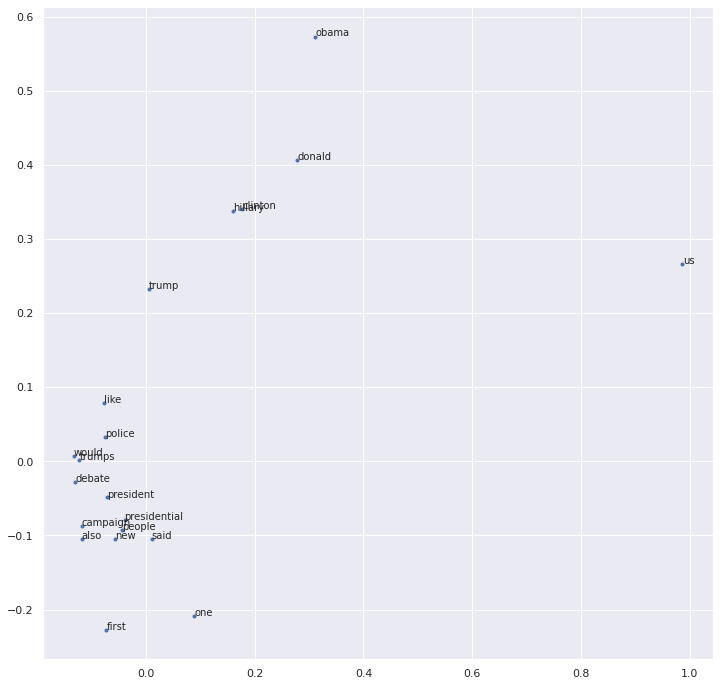

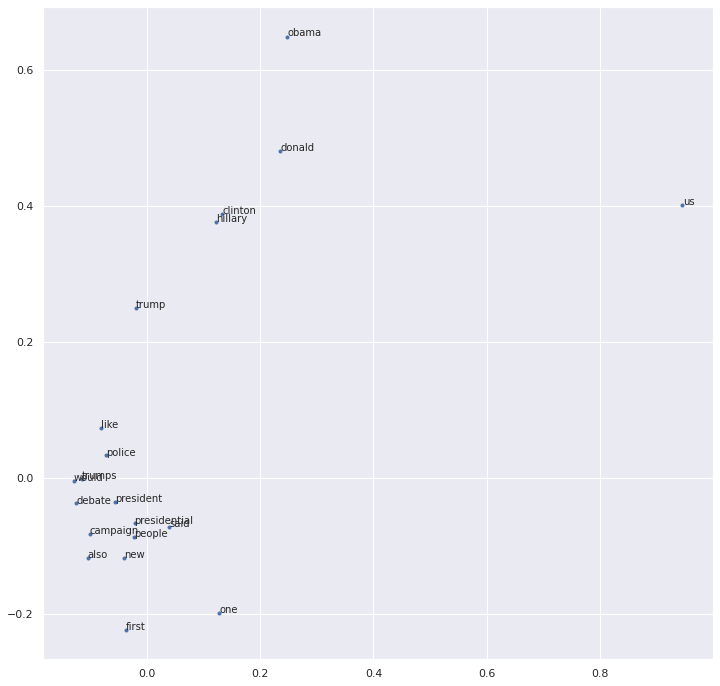

In [118]:
plot_words(vocab, U_der)
plot_words(vocab, U_izq)